In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

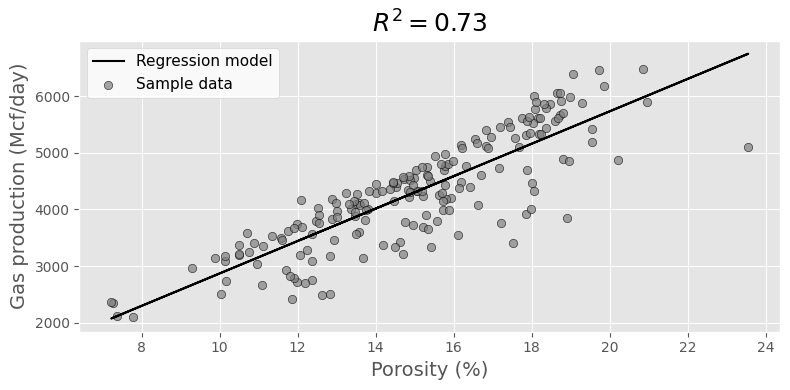

In [ ]:
file = '/home/aditya/Downloads/unconv_MV_v5.csv'
df = pd.read_csv(file)

X = df['Por'].values.reshape(-1,1)
y = df['Prod'].values

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Evaluate ############################################

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.text(0.8, 0.1, '',fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

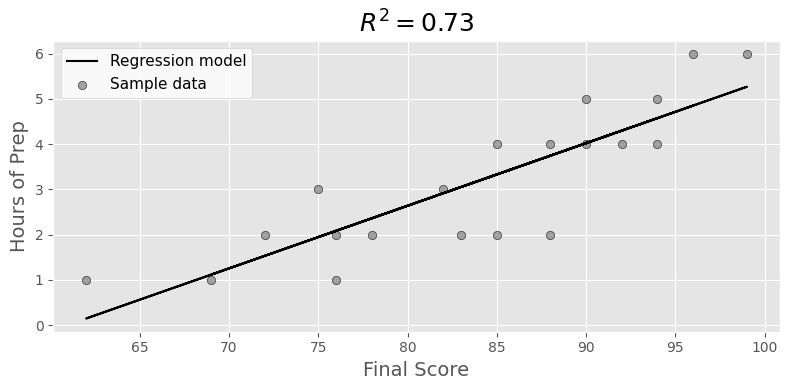

In [ ]:
file1 = '/home/aditya/Downloads/examples/exam.csv'
df = pd.read_csv(file1)

X1 = df['score'].values.reshape(-1,1)
Y1 = df['hours'].values

ols = linear_model.LinearRegression()
model = ols.fit(X1, Y1)
response = model.predict(X1)

r21 = model.score(X1,Y1)

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X1, response, color='k', label='Regression model')
ax.scatter(X1, Y1, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Hours of Prep', fontsize=14)
ax.set_xlabel('Final Score', fontsize=14)
ax.text(0.8, 0.1, '',fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r21, fontsize=18)

fig.tight_layout()

In [ ]:
df

,hours,prep_exams,score
0,1,1,76
1,2,3,78
2,2,3,85
3,4,5,88
4,2,2,72
5,1,2,69
6,5,1,94
7,4,1,94
8,2,0,88
9,4,3,92


In [ ]:
file2 = '/home/aditya/Downloads/examples/house_data.csv'
df = pd.read_csv(file2)
df['Size'].size
df

,Size,No. Of Bedrooms,No. Of Floors,Age,Price
0,2104,5,1,45,460
1,1416,3,2,40,232
2,1532,3,2,30,315
3,852,2,1,36,178
4,960,2,2,30,198
5,1850,4,3,35,407


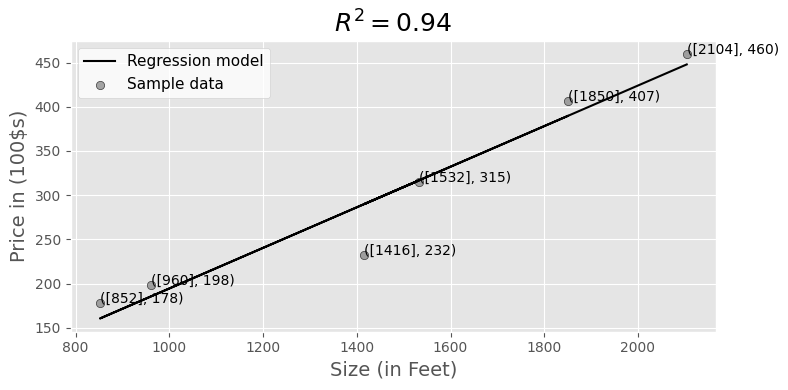

In [ ]:
X2 = df['Size'].values.reshape(df['Size'].size,1)
Y2 = df['Price'].values

ols = linear_model.LinearRegression()
model = ols.fit(X2, Y2)
response = model.predict(X2)

r21 = model.score(X2,Y2)

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X2, response, color='k', label='Regression model')
ax.scatter(X2, Y2, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Price in (100$s)', fontsize=14)
ax.set_xlabel('Size (in Feet)', fontsize=14)
ax.text(0.8, 0.1, '',fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r21, fontsize=18)

for i, j in zip(X2, Y2):
   plt.text(i, j, '({}, {})'.format(i, j))
   
fig.tight_layout()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_reg = PolynomialFeatures(degree=2)

polynomial_features = polynomial_reg.fit_transform(X2)
polynomial_features

array([[1.000000e+00, 2.104000e+03, 4.426816e+06],
       [1.000000e+00, 1.416000e+03, 2.005056e+06],
       [1.000000e+00, 1.532000e+03, 2.347024e+06],
       [1.000000e+00, 8.520000e+02, 7.259040e+05],
       [1.000000e+00, 9.600000e+02, 9.216000e+05],
       [1.000000e+00, 1.850000e+03, 3.422500e+06]])

In [ ]:
polynomial_reg.fit(polynomial_features,Y2)

PolynomialFeatures()

In [ ]:
poly_reg_new = linear_model.LinearRegression()
poly_reg_new.fit(polynomial_features, Y2)


LinearRegression()

ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.

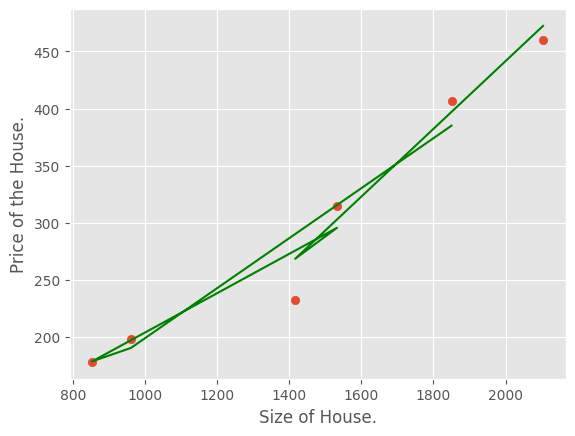

In [11]:
plt.scatter(X2, Y2)
plt.plot(X2, poly_reg_new.predict(polynomial_features), c='g')
plt.xlabel("Size of House.")
plt.ylabel("Price of the House.")
res = poly_reg_new.score(X2,Y2)

for i, j in zip(X2, Y2):
   plt.text(i, j, '({}, {})'.format(i, j))
plt.show()

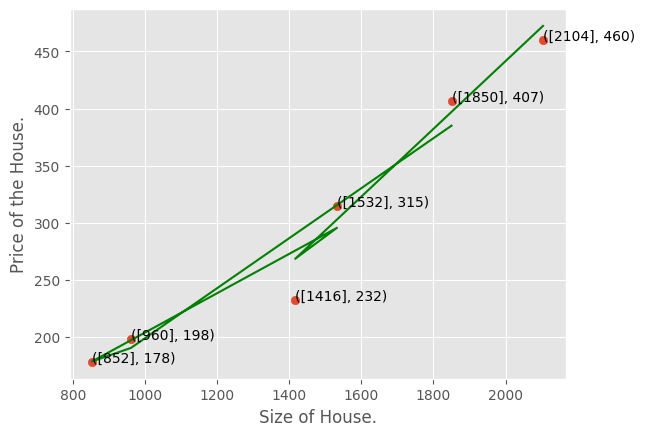

In [17]:
from sklearn.preprocessing import PolynomialFeatures

X2 = df['Size'].values.reshape(df['Size'].size,1)
Y2 = df['Price'].values
polynomial_reg = PolynomialFeatures(degree=2)

polynomial_features = polynomial_reg.fit_transform(X2)

polynomial_reg.fit(polynomial_features,Y2)

poly_reg_new = linear_model.LinearRegression()
poly_reg_new.fit(polynomial_features, Y2)

plt.scatter(X2, Y2)
plt.plot(X2, poly_reg_new.predict(polynomial_features), c='g')
plt.xlabel("Size of House.")
plt.ylabel("Price of the House.")

for i, j in zip(X2, Y2):
   plt.text(i, j, '({}, {})'.format(i, j))
plt.show()

In [ ]:
# example of gradient descent for a one-dimensional function
from numpy import asarray
from numpy.random import rand
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0

# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solution, solution_eval]
 
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 11000
# define the step size
step_size = 0.01
# perform the gradient descent search
best, score = gradient_descent(objective, derivative, bounds, n_iter, step_size)
print('Done!')
print('f(%s) = %f' % (best, score))

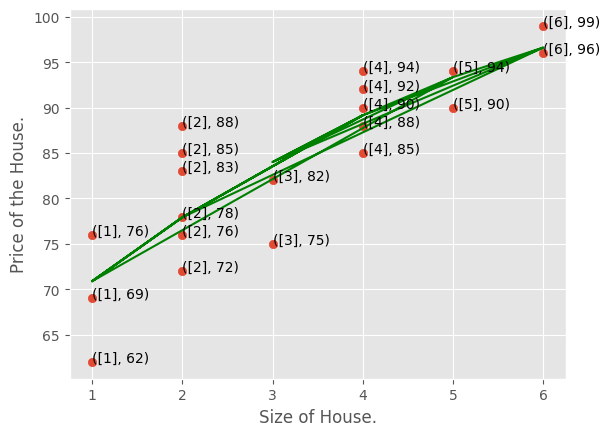

In [23]:
from sklearn.preprocessing import PolynomialFeatures
csv_file = '/home/aditya/Downloads/examples/exam.csv'
df1 = pd.read_csv(csv_file)
X2 = df1['hours'].values.reshape(-1,1)
Y2 = df1['score'].values
polynomial_reg = PolynomialFeatures(degree=2)

polynomial_features = polynomial_reg.fit_transform(X2)

polynomial_reg.fit(polynomial_features,Y2)

poly_reg_new = linear_model.LinearRegression()
poly_reg_new.fit(polynomial_features, Y2)

plt.scatter(X2, Y2)
plt.plot(X2, poly_reg_new.predict(polynomial_features), c='g')
plt.xlabel("Size of House.")
plt.ylabel("Price of the House.")

for i, j in zip(X2, Y2):
   plt.text(i, j, '({}, {})'.format(i, j))
plt.show()